### 15.4 Model of Pulse and Recycle (PULSE)
From Odum and Odum:
The CHAOS model (Figure 15.6a) illustrates the phenomenon
of mathematical chaos, which is common where complex systems
oscillate. With mathematical chaos, pulsing causes variation in
patterns of oscillation. The word chaos was selected because the
values on graphs appear erratic. However, choice of the word
chaos was unfortunate because it implies disorder, whereas the
patterns of mathematical chaos are determined exactly by the
equations just like other dynamic models. Chaotic pulsing is
usually increased with increased energy level.

One type of chaos occurs when pulsing of part of a system
affects oscillations elsewhere within the network. The CHAOS
model (Figure 15.6a) shows how one oscillating pair of units on
one time scale interacting with another oscillating pair on a faster
time scale causes both to change their patterns of pulsing. In other
words, there are oscillations in oscillation. Putting the model in
terms of an example can help the reader visualize the way units
of different size have different scales of oscillation. Although
this model does not have other features necessary to represent
ecosystems well, the four storages are labeled phytoplankton P,
zooplankton Q, small fish H, and larger carnivores C.

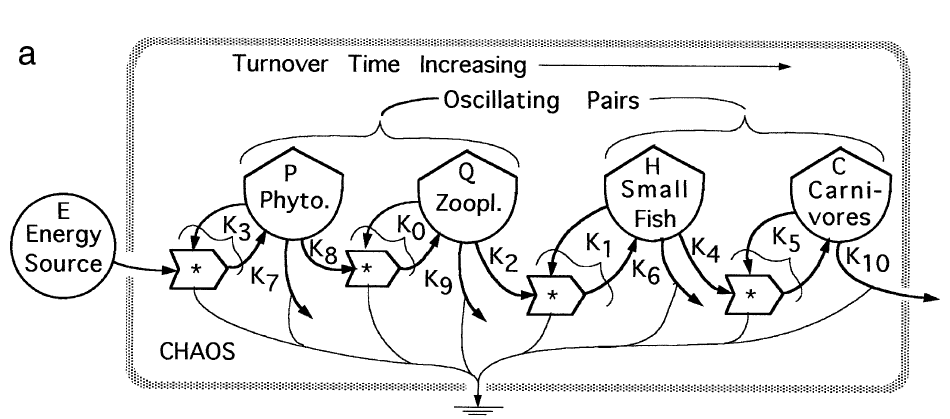

The model is expressed in differential equation format as:  

$$
\begin{align}
\frac{d P}{dt} & = K_3 E P - K_7 P - K_8 P Q \\
\frac{d Q}{dt} & = K_0 P Q - K_9 Q - K_2 Q H  \\
\frac{d H}{dt} & = K_1 Q H - K_4 C H - K_6 H \\
\frac{d C}{dt} & = K_5 H C - K_{10} C
\end{align}
$$

where $P$ represents phytoplankton biomass, $Q$ represents zooplankton biomass, $H$ represents small fish biomass, and $C$ represents large fish biomass. $E$ is a constant source of energy and $K_0$ ... $K_{10}$ are rate parameters describing the time frequency of the various species growth, death, and predation processes.

The model is implemented below using parameter values from Odum and Odum.

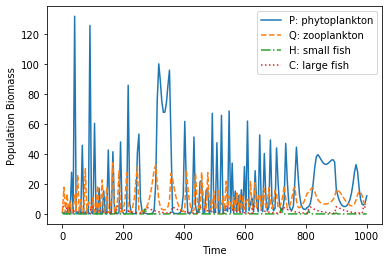

In [45]:
# import statements
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# set global constants
E = 500
K0, K1, K2, K3 = 0.2, 0.2, 0.1, 0.02
K4, K5, K6, K7 = 1.0, 0.5, 0.005, 0.5
K8, K9, K10 = 1.0, 3.0, 0.03
P0, H0, Q0, C0 = 1, 1, 1.0, 5
# set up the derivative function
def CHAOS(t, Q_arr):
    P, Q, H, C = Q_arr
    dP = K3*E*P - K7*P - K8*P*Q
    dQ = K0*P*Q - K9*Q - K2*Q*H
    dH = K1*Q*H - K4*C*H - K6*H
    dC = K5*H*C - K10*C
    return [dP, dQ, dH, dC]
# run the ODE solver
t_end = 1000
soln = solve_ivp(CHAOS, (0, t_end), [P0, H0, Q0, C0], dense_output=True, method='LSODA')
# graph the populations vs time
t_arr = np.linspace(0,t_end,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='P: phytoplankton')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q: zooplankton')
plt.plot(t_arr, soln.sol(t_arr)[2], '-.', label='H: small fish')
plt.plot(t_arr, soln.sol(t_arr)[3], ':', label='C: large fish')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend(loc='upper right')

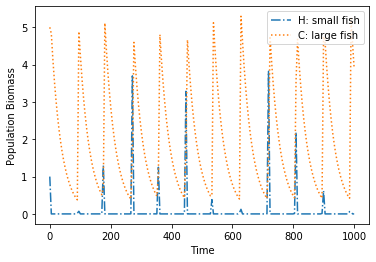

In [46]:
plt.plot(t_arr, soln.sol(t_arr)[2], '-.', label='H: small fish')
plt.plot(t_arr, soln.sol(t_arr)[3], ':', label='C: large fish')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend(loc='upper right')